In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
import pandas as pd

In [2]:
#Reading the Training data (virtually generated) from a file 
#Input data
x_data = pd.read_csv('x_rec_16_data_5.csv')
x_data=x_data.values[:,1:]
print("read_x_data")
#Output data
y_data = pd.read_csv('y_rec_16_data_5.csv')
y_data=y_data.values[:,1:]
print("read_y_data")
print(x_data[:2,:])
print(y_data[:2,:])

read_x_data
read_y_data
[[-0.97820564  0.29297193 -0.07061703 -0.96544182  0.2754832  -0.07559271
  -0.95055615  0.26713403 -0.06478687 -0.94939434  0.28851273 -0.05467842
  -1.02291172  0.31880814 -0.06668594 -1.02036267  0.29820167 -0.09116619
  -0.98972578  0.26476729 -0.09036746 -0.9837491   0.30531915 -0.07307987
  -1.06898421  0.34968716 -0.03087716 -1.12097493  0.35989869 -0.06120685
  -1.15727766  0.31518646 -0.15790448 -1.05000599  0.3741363  -0.18206539
  -0.59768246  0.20031284 -0.03087716 -0.54569173  0.19010131 -0.06120685
  -0.50938901  0.23481354 -0.15790448 -0.61666068  0.1758637  -0.18206539]
 [-0.96984174  0.28045413 -0.07554428 -0.95366561  0.26681943 -0.06915842
  -0.94867445  0.2803592  -0.05532045 -0.94855848  0.30831947 -0.06174094
  -1.02365787  0.3062235  -0.08467621 -0.9992982   0.27119693 -0.09646884
  -0.9827315   0.28755233 -0.07063151 -0.96914893  0.3312652  -0.09716293
  -1.10428192  0.35754912 -0.04928571 -1.163557    0.34725352 -0.12266363
  -1.09223439

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(x_data, y_data)
print(np.shape(X_train), np.shape(y_train), "training data size")
print(np.shape(X_val), np.shape(y_val),"Validation data size")
#print(X_train[0:9,:])

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(X_train)
xtrain_scale=scaler_x.transform(X_train)

scaler_x.fit(X_val)
xval_scale=scaler_x.transform(X_val)

scaler_y.fit(y_train)
ytrain_scale=scaler_y.transform(y_train)

scaler_y.fit(y_val)
yval_scale=scaler_y.transform(y_val)

(11718, 48) (11718, 7) training data size
(3907, 48) (3907, 7) Validation data size


In [4]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense
from numpy import loadtxt
from keras.models import load_model


input_layer = Input(shape=(48,))
hidden_layer_1 = Dense(units = 700, activation = 'relu')(input_layer)
hidden_layer_2 = Dense(units = 700, activation = 'relu')(hidden_layer_1)
output_layer = Dense(units = 7, activation = 'linear')(hidden_layer_2)
model = Model(inputs = input_layer, outputs = output_layer, name = 'sensor_concept_nn')
#opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='mae', optimizer='adam')
def scheduler(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

# Display the model
model.summary()

Model: "sensor_concept_nn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48)]              0         
_________________________________________________________________
dense (Dense)                (None, 700)               34300     
_________________________________________________________________
dense_1 (Dense)              (None, 700)               490700    
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 4907      
Total params: 529,907
Trainable params: 529,907
Non-trainable params: 0
_________________________________________________________________


In [5]:
history = model.fit(xtrain_scale, ytrain_scale, epochs=30, verbose=2, validation_data=(xval_scale,yval_scale),callbacks=[callback])


Epoch 1/30
367/367 - 2s - loss: 0.1916 - val_loss: 0.1745
Epoch 2/30
367/367 - 2s - loss: 0.1461 - val_loss: 0.1499
Epoch 3/30
367/367 - 2s - loss: 0.1305 - val_loss: 0.1416
Epoch 4/30
367/367 - 2s - loss: 0.1180 - val_loss: 0.1245
Epoch 5/30
367/367 - 2s - loss: 0.1093 - val_loss: 0.1151
Epoch 6/30
367/367 - 2s - loss: 0.1016 - val_loss: 0.1099
Epoch 7/30
367/367 - 2s - loss: 0.0941 - val_loss: 0.0996
Epoch 8/30
367/367 - 2s - loss: 0.0877 - val_loss: 0.0994
Epoch 9/30
367/367 - 2s - loss: 0.0830 - val_loss: 0.0988
Epoch 10/30
367/367 - 2s - loss: 0.0780 - val_loss: 0.1033
Epoch 11/30
367/367 - 2s - loss: 0.0751 - val_loss: 0.0836
Epoch 12/30
367/367 - 2s - loss: 0.0722 - val_loss: 0.0984
Epoch 13/30
367/367 - 2s - loss: 0.0697 - val_loss: 0.0900
Epoch 14/30
367/367 - 2s - loss: 0.0660 - val_loss: 0.0871
Epoch 15/30
367/367 - 2s - loss: 0.0640 - val_loss: 0.0869
Epoch 16/30
367/367 - 2s - loss: 0.0621 - val_loss: 0.0968
Epoch 17/30
367/367 - 2s - loss: 0.0602 - val_loss: 0.0910
Epoch 

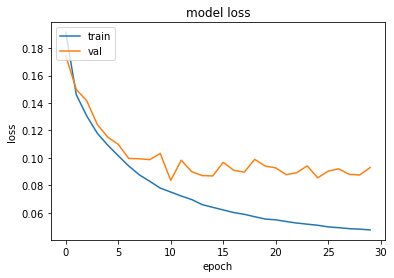

In [6]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
#plt.ylim(0.07,0.15)
plt.show()

In [7]:

#Creating a Callback subclass that stores each epoch prediction
class prediction_history(tf.keras.callbacks.Callback):
    def __init__(self):
        self.predhis = []
    def on_epoch_end(self, epoch, logs={}):
        self.predhis.append(model.predict(xval_scale))

#Calling the subclass
predictions=prediction_history()

#Executing the model.fit of the neural network
#model.fit(X=predictor_train, y=target_train, nb_epoch=2, batch_size=batch,validation_split=0.1,callbacks=[predictions]) 
history = model.fit(xtrain_scale, ytrain_scale, epochs=30, verbose=2, validation_data=(xval_scale,yval_scale),callbacks=[callback,predictions])
#Printing the prediction history
#print (predictions.predhis)

Epoch 1/30
367/367 - 2s - loss: 0.0471 - val_loss: 0.0900
Epoch 2/30
367/367 - 2s - loss: 0.0467 - val_loss: 0.0952
Epoch 3/30
367/367 - 2s - loss: 0.0465 - val_loss: 0.0888
Epoch 4/30
367/367 - 2s - loss: 0.0462 - val_loss: 0.0902
Epoch 5/30
367/367 - 2s - loss: 0.0460 - val_loss: 0.0957
Epoch 6/30
367/367 - 2s - loss: 0.0458 - val_loss: 0.0925
Epoch 7/30
367/367 - 2s - loss: 0.0452 - val_loss: 0.0904
Epoch 8/30
367/367 - 2s - loss: 0.0450 - val_loss: 0.0906
Epoch 9/30
367/367 - 2s - loss: 0.0445 - val_loss: 0.0906
Epoch 10/30
367/367 - 2s - loss: 0.0441 - val_loss: 0.0927
Epoch 11/30
367/367 - 2s - loss: 0.0439 - val_loss: 0.0934
Epoch 12/30
367/367 - 2s - loss: 0.0438 - val_loss: 0.0936
Epoch 13/30
367/367 - 2s - loss: 0.0434 - val_loss: 0.0943
Epoch 14/30
367/367 - 2s - loss: 0.0432 - val_loss: 0.0935
Epoch 15/30
367/367 - 2s - loss: 0.0430 - val_loss: 0.0933
Epoch 16/30
367/367 - 2s - loss: 0.0428 - val_loss: 0.0932
Epoch 17/30
367/367 - 2s - loss: 0.0427 - val_loss: 0.0924
Epoch 

In [8]:
check_data=predictions.predhis
np.shape(check_data)
err_sincos_mean=[]

for i in range(0,30):
    err_sincos = (check_data[i][:][2]**2+check_data[i][:][3]**2)-1
    err_sincos_mean.append(np.mean(err_sincos))
print(err_sincos_mean)

[-0.48859453, -0.5002366, -0.5010616, -0.50756294, -0.5051135, -0.5003068, -0.49120092, -0.49636883, -0.5057038, -0.49671096, -0.4813812, -0.49879423, -0.49752456, -0.48836845, -0.49080712, -0.49197748, -0.48757523, -0.48409572, -0.49167085, -0.4993472, -0.49362367, -0.4937438, -0.49039546, -0.49309826, -0.48874912, -0.48905605, -0.49451447, -0.4874418, -0.48825714, -0.49135348]


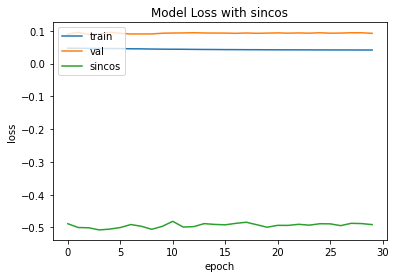

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(err_sincos_mean)
plt.title('Model Loss with sincos')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val','sincos'], loc='upper left')
#plt.ylim(0.07,0.15)
plt.show()

[0.09003322 0.0952348  0.0888193  0.09016813 0.0957431  0.09246449
 0.09041305 0.09057352 0.09059651 0.09272058 0.09335192 0.09362213
 0.09432304 0.093474   0.09326983 0.09316622 0.09240074 0.09347332
 0.092492   0.09307825 0.09380153 0.09290063 0.09366255 0.09284824
 0.09411566 0.09282193 0.09325586 0.09417446 0.09407562 0.09239128]


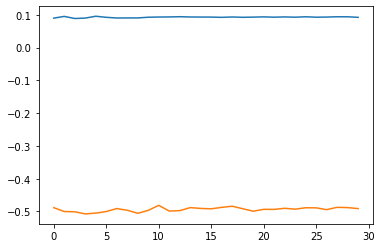

In [10]:
asd = np.array(history.history['val_loss'])
print(asd)

plt.plot(asd)
plt.plot(err_sincos_mean)
plt.show()

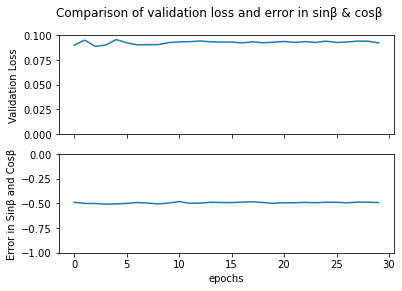

In [35]:
fig, axs = plt.subplots(2,sharex=True)
fig.suptitle('Comparison of validation loss and error in sinβ & cosβ ')
axs[0].plot(asd)
axs[1].plot(err_sincos_mean)
plt.xlabel('epochs')
axs[0].set_ylabel('Validation Loss')
axs[1].set_ylabel('Error in Sinβ and Cosβ')
axs[0].set_ylim([0, 0.1])
axs[1].set_ylim([-1, 0])
plt.savefig('relation_sincos.png', dpi=300, bbox_inches='tight')


-0.1879245066014118


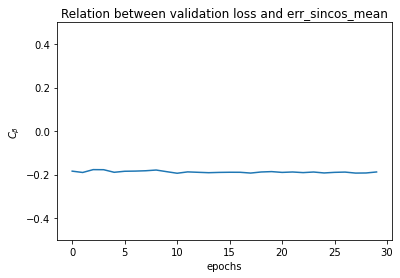

In [38]:
plt.plot(asd/err_sincos_mean)
plt.ylim(-0.5,0.5)

print(np.mean(asd/err_sincos_mean))
plt.xlabel('epochs')
plt.ylabel('$C_β$')
plt.title('Relation between validation loss and err_sincos_mean')
plt.savefig('error_indicator.png', dpi=300, bbox_inches='tight')
plt.show()

### err_sincos_mean is sin**2(beta)+cos**2(beat)-1
### asd is validation loss of the model

# asd = constant * err_sincos_mean

### the constant in this case is -0.2 


In [13]:
print(asd/err_sincos_mean)

[-0.1842698  -0.19037952 -0.17726222 -0.17764917 -0.1895477  -0.18481559
 -0.18406531 -0.18247222 -0.17914936 -0.18666908 -0.19392513 -0.18769689
 -0.18958469 -0.19140057 -0.19003358 -0.18937091 -0.18951073 -0.1930885
 -0.18811772 -0.18639986 -0.1900264  -0.18815553 -0.19099391 -0.18829562
 -0.19256436 -0.18979815 -0.18858064 -0.19320144 -0.19267638 -0.18803425]
